In [1]:
# Let's recall :
import numpy as np
arr = np.array([1,2,3,4,5])
print('mean: ', arr.mean())
print('standard deviation: ', arr.std())
arr = (arr - arr.mean()) / arr.std() 
arr
print('Standard deviation of the standardized array:', arr.std())
print('Mean of the new standardized array:',arr.mean())

mean:  3.0
standard deviation:  1.41421356237
Standard deviation of the standardized array: 1.0
Mean of the new standardized array: 0.0


{'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]), 'target_names': array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10'), 'data': array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
 

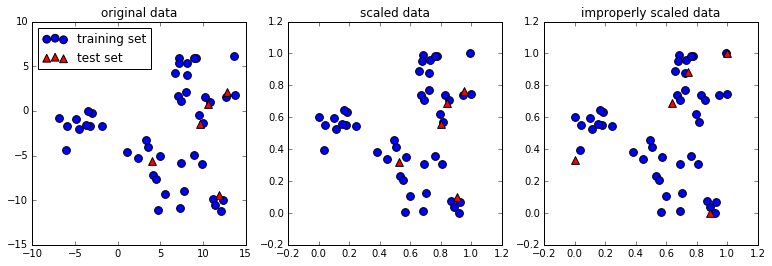

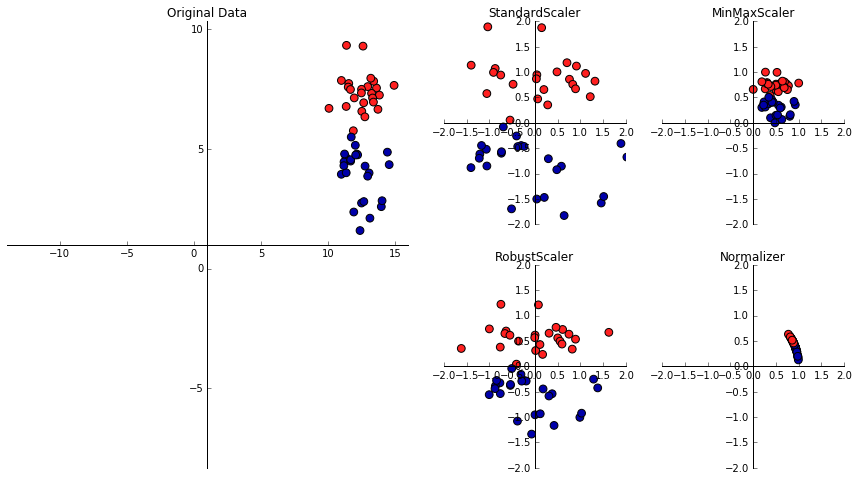

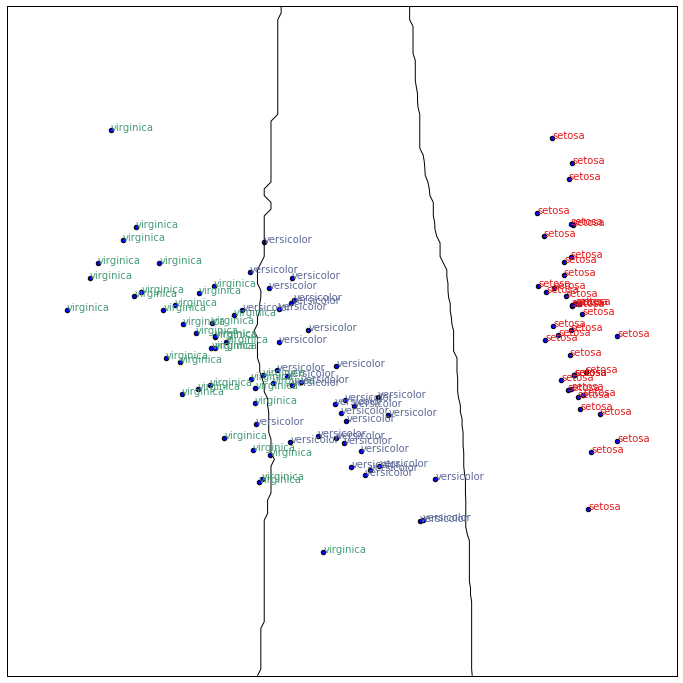

In [9]:
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
import numpy as np

iris = load_iris()
print(iris)
print('Whole dataset:', iris.data.shape)

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=10)
print('Train dataset:', X_train.shape)

# the iris dataset is not centered (it is not standardized at all)
print('mean of X_Train columns (features):', X_train.mean(axis=0))
print('standard deviation of X_train columns (features):', X_train.std(axis=0))

#so we can use a preprocessing method to scale this (only X, not y)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_standardized = scaler.transform(X_train)

# The dataset is now standardized
print('mean of X_Train columns (features):', X_train_standardized.mean(axis=0))
print('standard deviation of X_train columns (features):', X_train_standardized.std(axis=0))

# The standardized dataset has also exactly the same dimensions
print('Scaled dataset dimensions:', X_train_standardized.shape)

# The same transformation is also applied on the test set... with the parameters of the training one, so... this
# test set is not standardized really
X_test_standardized = scaler.transform(X_test)

# The dataset is now standardized
print('mean of X_test columns (features):', X_test_standardized.mean(axis=0))
print('standard deviation of X_test columns (features):', X_test_standardized.std(axis=0))

# scaling can be displayed
%matplotlib inline
from figures import plot_relative_scaling
plot_relative_scaling()
print('\n\nin the last case (right), we scaled test using their own fit... that leads to an improper scaling.')

from plot_scaling import plot_scaling
plot_scaling()


# PCA decomposition (cf file part 6)
from matplotlib import pyplot as plt
from sklearn import decomposition
pca = decomposition.PCA(n_components=2).fit(X_train)
X_pca = pca.transform(X_train)
plt.figure(figsize=(12,12))
plt.subplot(111)
plt.scatter(X_pca[:, 0], X_pca[:,1])
for i in range (X_pca.shape[0]):
    plt.text(X_pca[i, 0], X_pca[i, 1], str(iris.target_names[y_train[i]]), color=plt.cm.Set1(y_train[i]/10.))

    
#Classify from PCA decomposition
bestScore = 0
bestNeighbors = 0
from sklearn.neighbors import KNeighborsClassifier

for i in range(1,25):
    knc = KNeighborsClassifier(n_neighbors=i)

    knc.fit(X_pca, y_train)

    X_pca_test = pca.transform(X_test)
    y_predict = knc.predict(X_pca_test)
    #print('prediction: ', y_predict)
    #print('actual val: ', y_test)
    print('******** Results for #neighbors =',i)
    print('accuracy = ', np.sum((y_predict==y_test)/len(y_predict) * 100))
    print('accuracy via mean: ', np.mean(y_predict == y_test))

    score = knc.score(X_pca_test, y_test)
    print('Score classifier on test set: ', score)
    print('Score classifier on training set: ', knc.score(X_pca, y_train))
    if score > bestScore:
        bestScore = score
        bestNeighbors = i
        

print('\n\n*** Best score of {} with {} neighbors'.format(bestScore, bestNeighbors))

from figures import plot_2d_separator
plot_2d_separator(knc, X_pca)


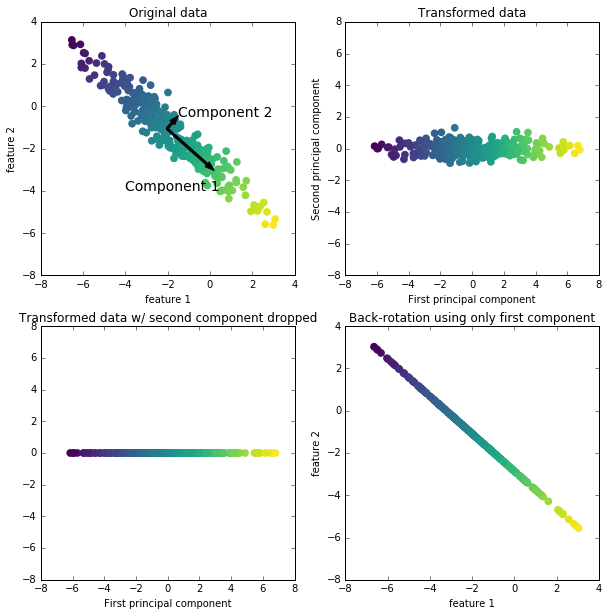

In [3]:
from plot_pca import plot_pca_illustration
plot_pca_illustration()

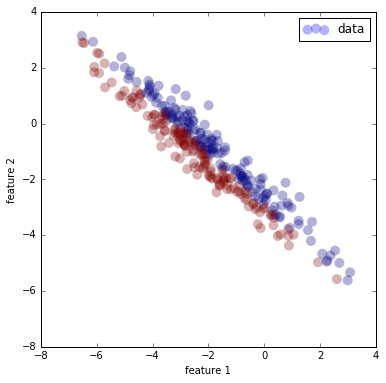

In [4]:
from matplotlib import pyplot as plt

rnd = np.random.RandomState(5)
X_ = rnd.normal(size=(300,2))

X_blob = X_

n2 = rnd.normal(size=(2,2))
n1 = rnd.normal(size=2)
#print('n1:', n1)
#print('n2:', n2)
X_blob = np.dot(X_, n2) + n1
#print('X_blob', X_blob)
y = X_[:, 0] > 0
#print('y: ', y.shape, np.bincount(y))
ybis = X_blob[:, 1] > 0
#print('ybis: ', ybis.shape, np.bincount(ybis))
#print('\n', y)

plt.figure(figsize=(6,6))
plt.scatter(X_blob[:,0], X_blob[:,1], c=y, linewidths = 0, s=100, alpha = 0.3, label='data')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()

In [5]:
from sklearn.decomposition import PCA
pca = PCA()

pca.fit(X_blob)


PCA(copy=True, n_components=None, whiten=False)

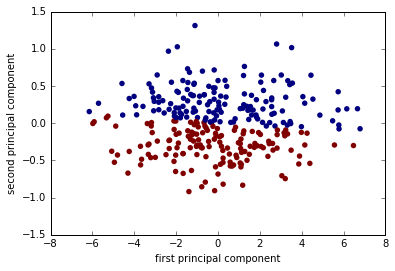

In [6]:
X_pca = pca.transform(X_blob)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, linewidths=0, s=30)
plt.xlabel('first principal component')
plt.ylabel('second principal component')

In [7]:
#Dimensionality Reduction for Visualization with PCA
#from plot_digits_datasets import digits_plot


In [8]:
#digits_plot()

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble, lda,
                     random_projection)

def digits_plot():
    digits = datasets.load_digits(n_class=6)
    n_digits = 500
    X = digits.data[:n_digits]
    y = digits.target[:n_digits]
    n_samples, n_features = X.shape
    n_neighbors = 30

    def plot_embedding(X, title=None):
        x_min, x_max = np.min(X, 0), np.max(X, 0)
        X = (X - x_min) / (x_max - x_min)

        plt.figure()
        ax = plt.subplot(111)
        for i in range(X.shape[0]):
            plt.text(X[i, 0], X[i, 1], str(digits.target[i]),
                    color=plt.cm.Set1(y[i] / 10.),
                    fontdict={'weight': 'bold', 'size': 9})

        if hasattr(offsetbox, 'AnnotationBbox'):
            # only print thumbnails with matplotlib > 1.0
            shown_images = np.array([[1., 1.]])  # just something big
            for i in range(X.shape[0]):
                dist = np.sum((X[i] - shown_images) ** 2, 1)
                if np.min(dist) < 1e5:
                    # don't show points that are too close
                    # set a high threshold to basically turn this off
                    continue
                shown_images = np.r_[shown_images, [X[i]]]
                imagebox = offsetbox.AnnotationBbox(
                    offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                    X[i])
                ax.add_artist(imagebox)
        plt.xticks([]), plt.yticks([])
        if title is not None:
            plt.title(title)

    n_img_per_row = 10
    img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
    for i in range(n_img_per_row):
        ix = 10 * i + 1
        for j in range(n_img_per_row):
            iy = 10 * j + 1
            img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))
    print('img shape: ', img.shape)
    plt.imshow(img, cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.title('A selection from the 64-dimensional digits dataset')
    print("Computing PCA projection")
    pca = decomposition.PCA(n_components=2).fit(X)
    X_pca = pca.transform(X)
    plot_embedding(X_pca, "Principal Components projection of the digits")
    plt.figure()
    plt.matshow(pca.components_[0, :].reshape(8, 8), cmap="gray")
    plt.axis('off')
    plt.figure()
    plt.matshow(pca.components_[1, :].reshape(8, 8), cmap="gray")
    plt.axis('off')
    plt.show()

C:\Users\nmauger\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\lda.py:4: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)


img shape:  (100, 100)
Computing PCA projection


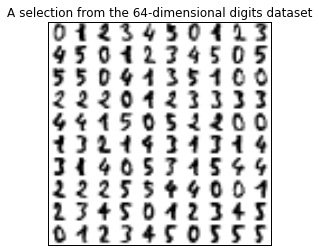

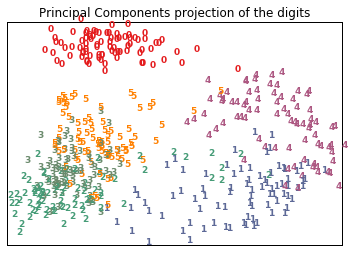

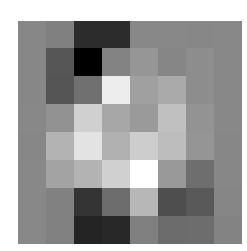

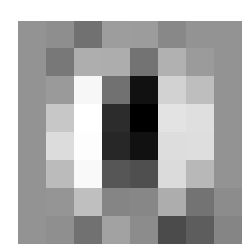

In [10]:
digits_plot()

digits data shape: (1083, 64)
digits target shape: (1083,)
reduced data shape: (100, 64)
reduced target shape: (100,)
100 samples of 64 features
raw data: [[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   5.  16. ...,   0.   0.   0.]
 [  0.   6.  16. ...,   0.   0.   0.]
 [  0.   2.  15. ...,   0.   0.   0.]]
******** Results for #neighbors = 1
accuracy =  67.2706681767
accuracy via mean:  0.672706681767
Score classifier on test set:  0.672706681767
Score classifier on training set:  1.0
******** Results for #neighbors = 2
accuracy =  68.1766704417
accuracy via mean:  0.681766704417
Score classifier on test set:  0.681766704417
Score classifier on training set:  0.9
******** Results for #neighbors = 3
accuracy =  69.5356738392
accuracy via mean:  0.695356738392
Score classifier on test set:  0.695356738392
Score classifier on training set:  0.89
******** Results for #neighbors = 4
accuracy =  69.1959229898


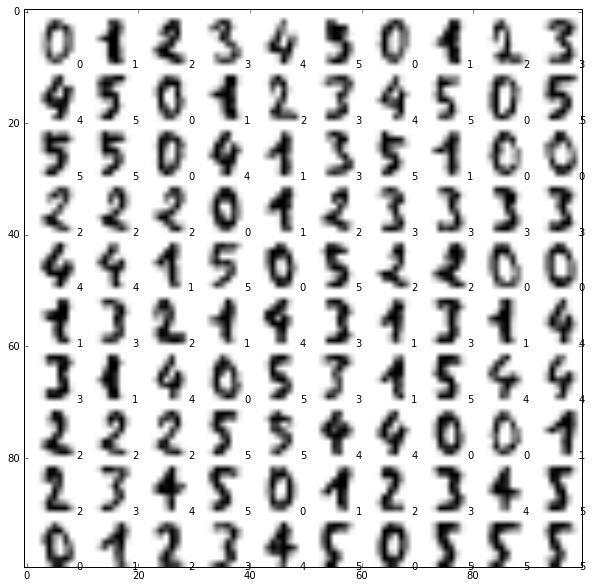

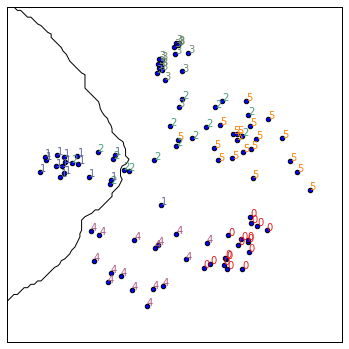

In [42]:
digits = datasets.load_digits(n_class=6)

print('digits data shape:', digits.data.shape)
print('digits target shape:', digits.target.shape)
n_digits = 100
X = digits.data[:n_digits]
y = digits.target[:n_digits]
print('reduced data shape:', X.shape)
print('reduced target shape:', y.shape)

n_samples, n_features = X.shape
print('{} samples of {} features'.format(n_samples, n_features))

print('raw data:', X)

# Personnal reordering
num_lines = 10
num_cols = 10

digit_size = 8 #width = height
digit_padding = 2

XN = np.zeros((num_lines*(digit_size+digit_padding), num_cols*(digit_size+digit_padding)))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

for digit in range(n_digits):
    plt.text(0.1*(digit%num_lines+1), 1-(0.1*(digit//num_lines+1)) ,y[digit], ha='center', va='center', transform=ax.transAxes)
    #plt.text(((digit//num_lines)*(digit_size+digit_padding)+line+digit_padding),i + (digit%num_lines)*(digit_size+digit_padding)+digit_padding,'matplotlib', ha='center', va='center', transform=ax.transAxes)
    #plt.text(1,2,'matplotlib', ha='center', va='center', transform=ax.transAxes)
    for line in range(digit_size):
        for i in range(digit_size):
            XN[((digit//num_lines)*(digit_size+digit_padding)+line+digit_padding)][i + (digit%num_lines)*(digit_size+digit_padding)+digit_padding] = X_[digit][line][i]


# small standardization (not really usefull in this case)
xn_min, xn_max = np.min(XN), np.max(XN)
XN = (XN - xn_min) / (xn_max - xn_min)
plt.imshow(XN, cmap=plt.cm.binary)

#PCA
pca = decomposition.PCA(n_components=2).fit(X)
pca.get_params()

X_pca = pca.transform(X)

plt.figure(figsize=(6,6))
plt.subplot(111)
plt.scatter(X_pca[:, 0], X_pca[:,1])
for i in range (X_pca.shape[0]):
    plt.text(X_pca[i, 0], X_pca[i, 1], str(digits.target[i]), color=plt.cm.Set1(y[i]/10.))



#Classify from PCA decomposition
bestScore = 0
bestNeighbors = 0
from sklearn.neighbors import KNeighborsClassifier

for i in range(1,25):
    knc = KNeighborsClassifier(n_neighbors=i)

    knc.fit(X_pca, y)

    #print(knc)
    #use a test set different from the train set (next n_digits in the dataset are perfect for this)
    X_test = digits.data[n_digits:-n_digits]
    y_test = digits.target[n_digits:-n_digits]

    X_pca_test = pca.transform(X_test)
    y_predict = knc.predict(X_pca_test)
    #print('prediction: ', y_predict)
    #print('actual val: ', y_test)
    print('******** Results for #neighbors =',i)
    print('accuracy = ', np.sum((y_predict==y_test)/len(y_predict) * 100))
    print('accuracy via mean: ', np.mean(y_predict == y_test))

    score = knc.score(X_pca_test, y_test)
    print('Score classifier on test set: ', score)
    print('Score classifier on training set: ', knc.score(X_pca, y))
    if score > bestScore:
        bestScore = score
        bestNeighbors = i
        

print('\n\n*** Best score of {} with {} neighbors'.format(bestScore, bestNeighbors))

from figures import plot_2d_separator
plot_2d_separator(knc, X_pca)